In [11]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Combine

## A script to normalize and combine the Reddit and Stupidstuff datasets

Special thanks to taivop for providing the [dataset](https://github.com/taivop/joke-dataset).

This notebook is heavily inspired by [fastai NLP work](https://github.com/fastai/fastai/blob/master/courses/dl2/imdb.ipynb).

In [12]:
import pdb
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [13]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag
EOJ = 'xeoj'  # end of joke tag

PATH=Path('data')

In [14]:
files = list(PATH.iterdir())
print(files)

[PosixPath('data/stupidstuff.json'), PosixPath('data/combined_jokes.json'), PosixPath('data/fastai'), PosixPath('data/reddit_jokes.json'), PosixPath('data/.ipynb_checkpoints')]


data/stupidstuff.json
{'body': "Pizza doesn't scream when you put it in the oven .\n\nI'm so sorry.", 'id': '5tz4dd', 'score': 0, 'title': "What's the difference between a Jew in Nazi Germany and pizza ?"}


61124782

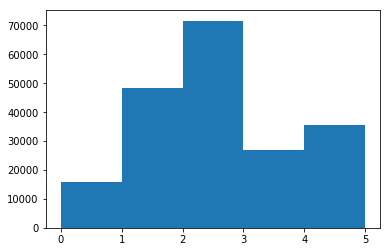

In [16]:
print(str(files[0]))
for fname in files:
    if "eddit" in str(fname):
        reddit_dataset = str(fname)
    if "upid" in str(fname):
        stupid_dataset = str(fname)
reddit_jokes = json.load(open(reddit_dataset))
stupid_jokes = json.load(open(stupid_dataset))
all_jokes = []
print(reddit_jokes[1])
for i in range(len(reddit_jokes)):
    r_joke = reddit_jokes[i]
    r_joke['rating']=round(math.log(r_joke['score']+random.randrange(1,10))/math.log(10)*5/2, 2)
    if r_joke['rating']>5:
        r_joke['rating']=5
    del r_joke['score'] 
    r_joke['body'] = r_joke['title']+" "+r_joke['body']
    del r_joke['title']
for s_joke in stupid_jokes:
    del s_joke['category']

combined = [joke['rating'] for joke in reddit_jokes]
combined = combined + [joke['rating'] for joke in stupid_jokes]
plt.hist(combined,bins=5);

combined_jokes = reddit_jokes + stupid_jokes
outfile = open("data/combined_jokes.json","w")
outfile.write(json.dumps(combined_jokes))
#for joke in combined_jokes:
#for char in json.dumps(joke): #was str(joke)
#        try:
#            outfile.write(char)
#        except(UnicodeEncodeError):
#            outfile.write("%")
#    outfile.write("\n")